In [176]:
import os
import pandas as pd

In [177]:
ROOT_DIR = os.path.join("..", "data")

# First dataset: Climate change Indicators
[Source](https://www.kaggle.com/datasets/tarunrm09/climate-change-indicators?resource=download)

In [178]:
data_path = os.path.join(ROOT_DIR, "climate_change_indicators.csv")
data = pd.read_csv(data_path)
data.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


I want to merge this data with only European data, so let’s select a subset.

In [179]:
european_countries = ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria",
                      "Croatia", "Cyprus", "Czech Rep.", "Denmark", "Estonia", "Finland", "France", "Germany",
                      "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia", "Liechtenstein",
                      "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands",
                      "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russian Federation", "San Marino",
                      "Serbia", "Slovak Rep.", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine",
                      "United Kingdom", "Vatican City"]


At first glance, I see that some countries, e.g. Andorra, have a longer name separated by a comma. This needs to be removed first, since only the single name is provided in this list.

In [180]:
eu_names_without_comma = data["Country"].apply(lambda x: x.split(",")[0])

In [181]:
eu_data = data[eu_names_without_comma.isin(european_countries)]

In [182]:
len(european_countries), len(eu_data)

(47, 44)

In [183]:
eu_data.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
12,13,Austria,AT,AUT,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.098,2.409,2.167,2.096,1.741,2.524,2.370,2.315,1.395,2.498
18,19,"Belarus, Rep. of",BY,BLR,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.212,2.180,2.247,2.201,1.592,2.342,2.689,3.510,1.728,1.922
19,20,Belgium,BE,BEL,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.463,2.417,1.371,1.882,1.731,2.196,2.081,2.572,1.203,2.807


There are still some missing. Let's check which ones.

In [184]:
missing_countries = [
    act_count for act_count in european_countries 
    if act_count not in eu_names_without_comma.tolist()
    ]
missing_countries

['Kosovo', 'Turkey', 'Vatican City']

In [185]:
data.loc[data["Country"].str.contains("Tu", na=False), "Country"]

203                     Tunisia
204                Turkmenistan
205    Turks and Caicos Islands
206                      Tuvalu
Name: Country, dtype: object

In [186]:
data.loc[data["Country"].str.contains("Va", na=False), "Country"]

215    Vanuatu
Name: Country, dtype: object

-> Kosovo, Turkey and Vatiacan seems not to be included in the data. Proceeding to work without them!

In [187]:
european_countries.remove("Vatican City")
european_countries.remove("Turkey")
european_countries.remove("Kosovo")

In [188]:
eu_data = data[eu_names_without_comma.isin(european_countries)]

len(eu_data), len(european_countries)

(44, 44)

In [189]:
eu_data.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
12,13,Austria,AT,AUT,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.098,2.409,2.167,2.096,1.741,2.524,2.370,2.315,1.395,2.498
18,19,"Belarus, Rep. of",BY,BLR,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.212,2.180,2.247,2.201,1.592,2.342,2.689,3.510,1.728,1.922
19,20,Belgium,BE,BEL,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.463,2.417,1.371,1.882,1.731,2.196,2.081,2.572,1.203,2.807


Now that we have our subset of European countries, let's check which values are interesting for further analysis.

In [190]:
eu_data.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source',
       'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 'F1961', 'F1962',
       'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
       'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
       'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
       'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
       'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
       'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
       'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
       'F2019', 'F2020', 'F2021', 'F2022'],
      dtype='object')

Let's check which units were used.

In [191]:
eu_data["Unit"].unique()

array(['Degree Celsius'], dtype=object)

In [192]:
eu_data = eu_data.drop("Unit", axis=1)

Looks good. Then let's check what `CTS_Full_Descriptor` means.

In [193]:
eu_data["CTS_Full_Descriptor"].unique()

array(['Environment, Climate Change, Climate Indicators, Surface Temperature Change'],
      dtype=object)

In [194]:
eu_data = eu_data.drop("CTS_Full_Descriptor", axis=1)

Does not provide any interesting contents. Therfore this column will get drop.

In [195]:
eu_data["ISO2"].unique()

array(['AL', 'AD', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK',
       'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IS', 'IE', 'IT', 'LV', 'LI',
       'LT', 'LU', 'MT', 'MD', 'MC', 'ME', 'NL', 'MK', 'NO', 'PL', 'PT',
       'RO', 'RU', 'SM', 'RS', 'SK', 'SI', 'ES', 'SE', 'CH', 'UA', 'GB'],
      dtype=object)

In [196]:
eu_data["Indicator"].unique()

array(['Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980'],
      dtype=object)

In [197]:
eu_data = eu_data.drop("Indicator", axis=1)

In [198]:
eu_data["Source"].unique()

array(['Food and Agriculture Organization of the United Nations (FAO). 2022. FAOSTAT Climate Change, Climate Indicators, Temperature change. License: CC BY-NC-SA 3.0 IGO. Extracted from:\xa0https://www.fao.org/faostat/en/#data/ET. Accessed on 2023-03-28.'],
      dtype=object)

In [199]:
eu_data = eu_data.drop("Source", axis=1)

In [200]:
eu_data["CTS_Code"].unique(), eu_data["CTS_Name"].unique()

(array(['ECCS'], dtype=object),
 array(['Surface Temperature Change'], dtype=object))

In [201]:
eu_data = eu_data.drop(["CTS_Code", "CTS_Name", "ObjectId"], axis=1)

In [202]:
eu_data.head()

,Country,ISO2,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,F1967,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
1,Albania,AL,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
4,"Andorra, Principality of",AD,AND,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
12,Austria,AT,AUT,1.031,-0.621,-0.727,-0.371,-0.883,0.602,0.676,...,1.098,2.409,2.167,2.096,1.741,2.524,2.370,2.315,1.395,2.498
18,"Belarus, Rep. of",BY,BLR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.212,2.180,2.247,2.201,1.592,2.342,2.689,3.510,1.728,1.922
19,Belgium,BE,BEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.463,2.417,1.371,1.882,1.731,2.196,2.081,2.572,1.203,2.807


Let's create an example plot for Albania.

In [203]:
albania_col = eu_data[eu_data["Country"] == "Albania"]

In [204]:
albania_col = albania_col.drop(["Country", "ISO2", "ISO3"], axis=1)
albania_col.to_numpy()

array([[ 0.627,  0.326,  0.075, -0.166, -0.388,  0.559, -0.074,  0.081,
        -0.013, -0.106, -0.195, -0.069, -0.288, -0.139, -0.211, -0.683,
         0.545, -0.814,  0.203, -0.414, -0.351,  0.173, -0.128, -0.27 ,
        -0.103,  0.569, -0.106,  0.37 , -0.066,  0.795, -0.269,  0.106,
         0.076,  1.33 , -0.172, -0.038,  0.075,  0.795,  0.67 ,  1.065,
         1.532,  0.492,  0.97 ,  0.444,  0.189,  0.345,  1.316,  0.978,
         0.91 ,  1.191,  1.055,  1.487,  1.333,  1.198,  1.569,  1.464,
         1.121,  2.028,  1.675,  1.498,  1.536,  1.518]])

In [205]:
vals = albania_col.loc[1].to_list()
index = albania_col.columns.to_list()

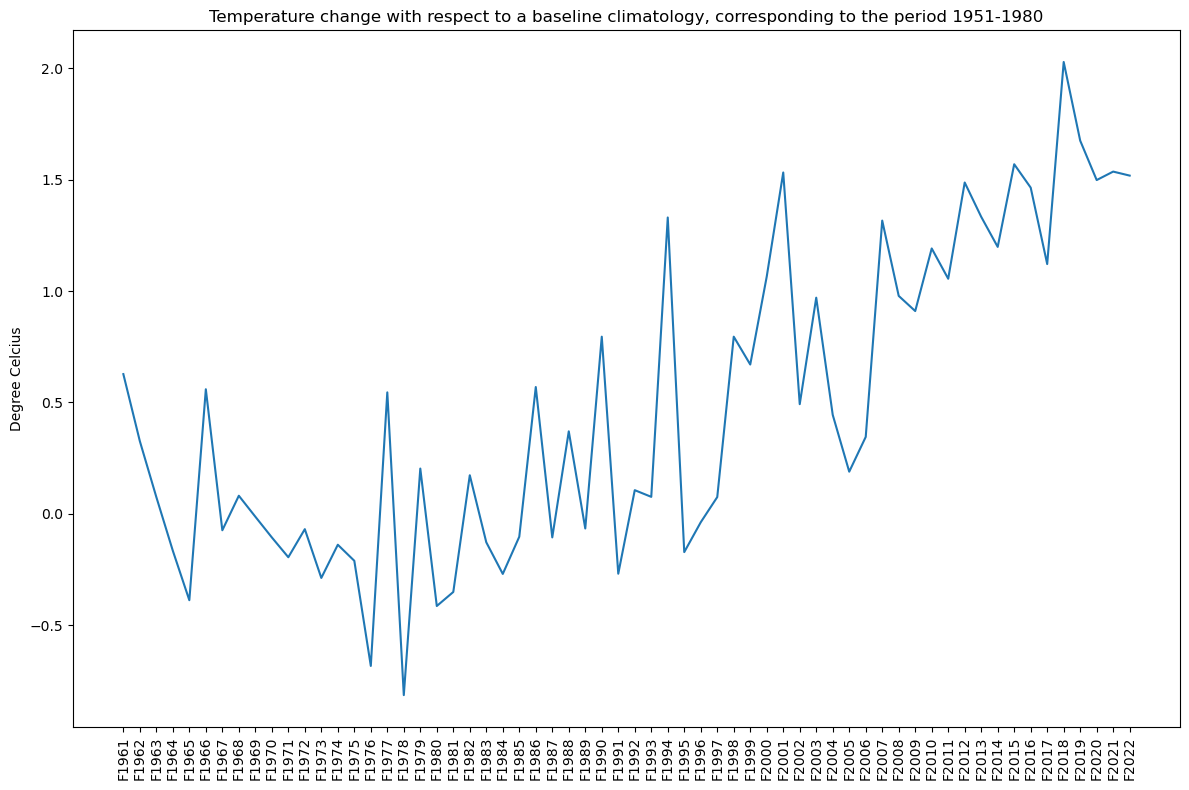

In [206]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)

plt.title("Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980")
plt.ylabel("Degree Celcius")
plt.plot(index, vals)
plt.tight_layout()

LGTM! Now, the dataframe is being redesigned so that the columns are transformed into rows. This will make the concatenation of both datasets easier later on.

In [207]:
import numpy as np

def extract_values(df: pd.DataFrame, country: str) -> list:
    row = df[df["Country"] == country]
    vals = row.drop(["Country", "ISO2", "ISO3"], axis=1).values.flatten()
    
    # If there are no values, then fill the numpy array with nan values.
    # With problem will be solved afterwards.
    if not list(vals):
        vals = np.empty(62)
        vals[:] = np.nan

    return vals

In [208]:
climate_change_vals = {act_country: extract_values(eu_data, act_country) for act_country in european_countries}

In [209]:
climate_change_vals

{'Albania': array([ 0.627,  0.326,  0.075, -0.166, -0.388,  0.559, -0.074,  0.081,
        -0.013, -0.106, -0.195, -0.069, -0.288, -0.139, -0.211, -0.683,
         0.545, -0.814,  0.203, -0.414, -0.351,  0.173, -0.128, -0.27 ,
        -0.103,  0.569, -0.106,  0.37 , -0.066,  0.795, -0.269,  0.106,
         0.076,  1.33 , -0.172, -0.038,  0.075,  0.795,  0.67 ,  1.065,
         1.532,  0.492,  0.97 ,  0.444,  0.189,  0.345,  1.316,  0.978,
         0.91 ,  1.191,  1.055,  1.487,  1.333,  1.198,  1.569,  1.464,
         1.121,  2.028,  1.675,  1.498,  1.536,  1.518]),
 'Andorra': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'Austria': array([ 1.031, -0.621, -0.727, -0.371, -0.883,  0.60

In [210]:
climate_change_df = pd.DataFrame()

for country, values in climate_change_vals.items():
    temp_df = pd.DataFrame()
    temp_df['Country'] = [country] * len(values)
    temp_df['Year'] = list(range(1961, 1961 + len(values)))
    temp_df['change_degree_celcius'] = values
    climate_change_df = pd.concat([climate_change_df, temp_df])

climate_change_df.reset_index(drop=True, inplace=True)

In [211]:
climate_change_df

,Country,Year,change_degree_celcius
0,Albania,1961,0.627
1,Albania,1962,0.326
2,Albania,1963,0.075
3,Albania,1964,-0.166
4,Albania,1965,-0.388
...,...,...,...
2723,United Kingdom,2018,0.998
2724,United Kingdom,2019,1.231
2725,United Kingdom,2020,1.373
2726,United Kingdom,2021,0.929


Also, add the ISO2 abbreviation as the second dataset uses them. This will make the concatenation easier later on.

In [212]:
iso_2_abs = eu_data["ISO2"].unique()
country_names = eu_data["Country"].unique()

country_name_to_iso_2 = {country_name.split(",")[0]: iso_2_abs[idx] for idx, country_name in enumerate(country_names)}
country_name_to_iso_2

{'Albania': 'AL',
 'Andorra': 'AD',
 'Austria': 'AT',
 'Belarus': 'BY',
 'Belgium': 'BE',
 'Bosnia and Herzegovina': 'BA',
 'Bulgaria': 'BG',
 'Croatia': 'HR',
 'Cyprus': 'CY',
 'Czech Rep.': 'CZ',
 'Denmark': 'DK',
 'Estonia': 'EE',
 'Finland': 'FI',
 'France': 'FR',
 'Germany': 'DE',
 'Greece': 'GR',
 'Hungary': 'HU',
 'Iceland': 'IS',
 'Ireland': 'IE',
 'Italy': 'IT',
 'Latvia': 'LV',
 'Liechtenstein': 'LI',
 'Lithuania': 'LT',
 'Luxembourg': 'LU',
 'Malta': 'MT',
 'Moldova': 'MD',
 'Monaco': 'MC',
 'Montenegro': 'ME',
 'Netherlands': 'NL',
 'North Macedonia': 'MK',
 'Norway': 'NO',
 'Poland': 'PL',
 'Portugal': 'PT',
 'Romania': 'RO',
 'Russian Federation': 'RU',
 'San Marino': 'SM',
 'Serbia': 'RS',
 'Slovak Rep.': 'SK',
 'Slovenia': 'SI',
 'Spain': 'ES',
 'Sweden': 'SE',
 'Switzerland': 'CH',
 'Ukraine': 'UA',
 'United Kingdom': 'GB'}

In [213]:
climate_change_df["ISO_2"] = climate_change_df["Country"].apply(lambda x: country_name_to_iso_2[x])
climate_change_df

,Country,Year,change_degree_celcius,ISO_2
0,Albania,1961,0.627,AL
1,Albania,1962,0.326,AL
2,Albania,1963,0.075,AL
3,Albania,1964,-0.166,AL
4,Albania,1965,-0.388,AL
...,...,...,...,...
2723,United Kingdom,2018,0.998,GB
2724,United Kingdom,2019,1.231,GB
2725,United Kingdom,2020,1.373,GB
2726,United Kingdom,2021,0.929,GB


In [214]:
climate_change_df.loc[climate_change_df["ISO_2"] == "GB" , "ISO_2"] = "UK"

In [215]:
climate_change_df

,Country,Year,change_degree_celcius,ISO_2
0,Albania,1961,0.627,AL
1,Albania,1962,0.326,AL
2,Albania,1963,0.075,AL
3,Albania,1964,-0.166,AL
4,Albania,1965,-0.388,AL
...,...,...,...,...
2723,United Kingdom,2018,0.998,UK
2724,United Kingdom,2019,1.231,UK
2725,United Kingdom,2020,1.373,UK
2726,United Kingdom,2021,0.929,UK


Looks good to me. Now let's load the second data!
# Second dataset: Primary energy consumption of the EU
[SOURCE](https://ec.europa.eu/eurostat/databrowser/view/sdg_07_10/default/table)

In [216]:
data_path = os.path.join(ROOT_DIR, "sdg_07_10_linear.csv")
data = pd.read_csv(data_path)
data = data.drop(["LAST UPDATE", "DATAFLOW", "freq"], axis=1)
data.head()

,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,I05,AL,2000,83.8,NaN
1,I05,AL,2001,85.6,NaN
2,I05,AL,2002,96.6,NaN
3,I05,AL,2003,93.7,NaN
4,I05,AL,2004,100.2,NaN


In [217]:
data["geo"].unique()

array(['AL', 'AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES',
       'EU27_2020', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU',
       'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE',
       'SI', 'SK', 'TR', 'UK', 'XK', 'BA'], dtype=object)

It appears to be ISO2 abbreviations. `EU27_2020` does not seem to be a valid country. Let’s disregard those values that correspond to `EU27_2020`.

In [218]:
data = data[data["geo"] != "EU27_2020"]
data["geo"].unique() 

array(['AL', 'AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME',
       'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK',
       'TR', 'UK', 'XK', 'BA'], dtype=object)

Doublechecking if really everything worked out.

In [219]:
data["geo"].unique() == climate_change_df["ISO_2"].unique()

C:\Users\denni\AppData\Local\Temp\ipykernel_18984\3796691928.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  data["geo"].unique() == climate_change_df["ISO_2"].unique()


False

In [220]:
unique_geo = data["geo"].unique()
unique_iso2 = climate_change_df["ISO_2"].unique()

[value for value in unique_geo if value not in unique_iso2]

['EL', 'TR', 'XK']

Again Turkey (TR) and Kosovo (XK) are missing. That makes sense, since this countries were removed earlier. For now, we have to removed them again from the other dataset.

After a quick search, I found that the abbrevation `EL` stands for greece according to the EUROSTAT website. I will change that into `GR`, so that it is identical for both datasets. 

In [221]:
data['geo'] = data['geo'].replace({"EL": "GR"})

# Ensure 'geo' values match 'ISO_2' values
matching_values = data['geo'].isin(climate_change_df['ISO_2'])

data.loc[~matching_values, 'geo'].unique()

array(['TR', 'XK'], dtype=object)

Perfect, this worked. Let's remove `TR` and `XK`!

In [222]:
data = data[data['geo'].isin(climate_change_df['ISO_2'])]
data.loc[~matching_values, 'geo'].unique()

array([], dtype=object)

In [223]:
data["TIME_PERIOD"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

-> It appears that the data coverage starts from the year 2000. Therefore, I will need to exclude all years prior to 2000 from the other dataset, given that it starts from 1967.

Now, let’s examine the units that the dataframe comprises.

In [224]:
data["unit"].unique()

array(['I05', 'MTOE', 'TOE_HAB'], dtype=object)

I have no idea what that means. Let's check the documentation:
* `MTOE` = Million tonnes of oil equivalent
* `I05` = Index, 2005 = 100
* `TOE_HAB` = Tonnes of oil equvialent per capita

In [225]:
test = data[data["geo"] == "AL"]

In [226]:
test

,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,I05,AL,2000,83.80,NaN
1,I05,AL,2001,85.60,NaN
2,I05,AL,2002,96.60,NaN
3,I05,AL,2003,93.70,NaN
4,I05,AL,2004,100.20,NaN
...,...,...,...,...,...
1695,TOE_HAB,AL,2017,0.81,NaN
1696,TOE_HAB,AL,2018,0.82,NaN
1697,TOE_HAB,AL,2019,0.81,NaN
1698,TOE_HAB,AL,2020,0.76,NaN


In [227]:
test["unit"].value_counts()

I05        22
MTOE       22
TOE_HAB    22
Name: unit, dtype: int64

It appears that each unit was measured for every year. Likely, MTOE and TOE_HAB will be the most interesting. I plan to remove I05, as it is not well documented.

In [228]:
enery_consumption_df = data[data["unit"] != "I05"]
enery_consumption_df

,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
835,MTOE,AL,2000,1.80,NaN
836,MTOE,AL,2001,1.80,NaN
837,MTOE,AL,2002,2.10,NaN
838,MTOE,AL,2003,2.00,NaN
839,MTOE,AL,2004,2.10,NaN
...,...,...,...,...,...
2491,TOE_HAB,UK,2015,2.80,NaN
2492,TOE_HAB,UK,2016,2.73,NaN
2493,TOE_HAB,UK,2017,2.68,NaN
2494,TOE_HAB,UK,2018,2.67,NaN


# Concatenating both datasets
Firstly, let's divide the `energy_consumption_df` into two distinct dataframes, one for each unit.

In [229]:
mtoe_df = enery_consumption_df[enery_consumption_df["unit"] == "MTOE"]
toe_hab_df = enery_consumption_df[enery_consumption_df["unit"] == "TOE_HAB"]

In [230]:
mtoe_df.head()

,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
835,MTOE,AL,2000,1.8,NaN
836,MTOE,AL,2001,1.8,NaN
837,MTOE,AL,2002,2.1,NaN
838,MTOE,AL,2003,2.0,NaN
839,MTOE,AL,2004,2.1,NaN


Subsequently, remove only consider the years beginning from 2000 for the `climate_change_df`, since the second one starts from there.

In [231]:
climate_change_df = climate_change_df[climate_change_df["Year"] > 1999]
climate_change_df.head()

,Country,Year,change_degree_celcius,ISO_2
39,Albania,2000,1.065,AL
40,Albania,2001,1.532,AL
41,Albania,2002,0.492,AL
42,Albania,2003,0.970,AL
43,Albania,2004,0.444,AL


Finally, construct one large dataframe. Since the energy consumption dataframes comprises less countries than the other one, we need to append according to that.

In [232]:
final_countries = mtoe_df["geo"].unique().tolist()
final_countries[:5]

['AL', 'AT', 'BA', 'BE', 'BG']

Renaming column names for easier distinction.

In [233]:
climate_change_df.columns

Index(['Country', 'Year', 'change_degree_celcius', 'ISO_2'], dtype='object')

LGTM!

In [234]:
mtoe_df.columns

Index(['unit', 'geo', 'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'], dtype='object')

In [235]:
mtoe_df = mtoe_df.drop(["unit", "OBS_FLAG"], axis=1)
toe_hab_df = toe_hab_df.drop(["unit", "OBS_FLAG"], axis=1)

In [236]:
mtoe_df = mtoe_df.rename(columns={"geo": "ISO_2", "TIME_PERIOD": "Year", "OBS_VALUE": "energy_million_tons_oil_equivalent"})
mtoe_df

,ISO_2,Year,energy_million_tons_oil_equivalent
835,AL,2000,1.8
836,AL,2001,1.8
837,AL,2002,2.1
838,AL,2003,2.0
839,AL,2004,2.1
...,...,...,...
1651,UK,2015,182.6
1652,UK,2016,179.4
1653,UK,2017,177.3
1654,UK,2018,177.2


In [237]:
toe_hab_df = toe_hab_df.rename(columns={"geo": "ISO_2", "TIME_PERIOD": "Year", "OBS_VALUE": "energy_million_tons_oil_equivalent"})
toe_hab_df

,ISO_2,Year,energy_million_tons_oil_equivalent
1678,AL,2000,0.58
1679,AL,2001,0.59
1680,AL,2002,0.68
1681,AL,2003,0.65
1682,AL,2004,0.70
...,...,...,...
2491,UK,2015,2.80
2492,UK,2016,2.73
2493,UK,2017,2.68
2494,UK,2018,2.67


In [238]:
toe_hab_df.columns, mtoe_df.columns, climate_change_df.columns

(Index(['ISO_2', 'Year', 'energy_million_tons_oil_equivalent'], dtype='object'),
 Index(['ISO_2', 'Year', 'energy_million_tons_oil_equivalent'], dtype='object'),
 Index(['Country', 'Year', 'change_degree_celcius', 'ISO_2'], dtype='object'))

In [239]:
mtoe_df

,ISO_2,Year,energy_million_tons_oil_equivalent
835,AL,2000,1.8
836,AL,2001,1.8
837,AL,2002,2.1
838,AL,2003,2.0
839,AL,2004,2.1
...,...,...,...
1651,UK,2015,182.6
1652,UK,2016,179.4
1653,UK,2017,177.3
1654,UK,2018,177.2


In [240]:
final_df = toe_hab_df.merge(mtoe_df, on=["ISO_2", "Year"], how="outer")
final_df

,ISO_2,Year,energy_million_tons_oil_equivalent_x,energy_million_tons_oil_equivalent_y
0,AL,2000,0.58,1.8
1,AL,2001,0.59,1.8
2,AL,2002,0.68,2.1
3,AL,2003,0.65,2.0
4,AL,2004,0.70,2.1
...,...,...,...,...
771,UK,2018,2.67,177.2
772,UK,2019,2.61,174.3
773,BA,2019,NaN,7.1
774,BA,2020,NaN,7.0


In [241]:
final_df = final_df.merge(climate_change_df, on=["ISO_2", "Year"], how="outer")
final_df.head()

,ISO_2,Year,energy_million_tons_oil_equivalent_x,energy_million_tons_oil_equivalent_y,Country,change_degree_celcius
0,AL,2000,0.58,1.8,Albania,1.065
1,AL,2001,0.59,1.8,Albania,1.532
2,AL,2002,0.68,2.1,Albania,0.492
3,AL,2003,0.65,2.0,Albania,0.970
4,AL,2004,0.70,2.1,Albania,0.444


I cannot image that this worked flawless. Therefore I will further if some mistakes happend.

In [242]:
final_df["ISO_2"].unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'GR',
       'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV',
       'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI',
       'SK', 'UK', 'AD', 'BY', 'LI', 'MD', 'MC', 'RU', 'SM', 'CH', 'UA'],
      dtype=object)

In [243]:
final_df.describe()

,Year,energy_million_tons_oil_equivalent_x,energy_million_tons_oil_equivalent_y,change_degree_celcius
count,1012.000000,773.000000,776.000000,753.000000
mean,2011.000000,3.514968,48.279768,1.429157
std,6.636529,2.556884,72.305604,0.609374
min,2000.000000,0.580000,0.700000,-0.341000
25%,2005.000000,2.210000,5.900000,1.023000
50%,2011.000000,2.940000,19.950000,1.406000
75%,2017.000000,3.870000,45.725000,1.831000
max,2022.000000,18.690000,332.800000,3.691000


LGTM!